#**Desafío 9**
##Introducción a Data Science

##Francisca Pinto, 31 de agosto de 2021

###**Desafío 1**

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams["figure.dpi"] = 150

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path_colab = "/content/Credit.csv"
df = pd.read_csv(path_colab)
df.drop(columns = "Unnamed: 0", inplace = True)

Luego de revisar las vairables, las columnas con las cuales se crearán nuevas variables binarias (categóricas) son:

1. Gender
2. Student
3. Married
4. Ethnicity

Se crea nuevo df_bin para incorporarlas. Se utiliza método OHE para que todas las variables queden expresadas explícitamente.

In [4]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [5]:
df_bin = pd.get_dummies(data = df, columns = ["Gender", "Student", "Married", "Ethnicity"], drop_first = False)
df_bin

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,333,1,0,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,903,0,1,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,580,1,0,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,964,0,1,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,331,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,560,1,0,1,0,0,1,0,0,1
396,13.364,3838,296,5,65,17,480,1,0,1,0,1,0,1,0,0
397,57.872,4171,321,5,67,12,138,0,1,1,0,0,1,0,0,1
398,37.728,2525,192,1,44,13,0,1,0,1,0,0,1,0,0,1


Ahora se contará la frecuencia de cada una de estas variables.

In [6]:
categorical_cols = ["Gender_ Male", "Gender_Female", "Student_No", "Student_Yes", "Married_No", "Married_Yes", "Ethnicity_African American", "Ethnicity_Asian", "Ethnicity_Caucasian"]

for cat in categorical_cols:
  print("\n", cat)
  print(df_bin[cat].value_counts())
  print(df_bin[cat].value_counts()/len(df_bin[cat]))


 Gender_ Male
0    207
1    193
Name: Gender_ Male, dtype: int64
0    0.5175
1    0.4825
Name: Gender_ Male, dtype: float64

 Gender_Female
1    207
0    193
Name: Gender_Female, dtype: int64
1    0.5175
0    0.4825
Name: Gender_Female, dtype: float64

 Student_No
1    360
0     40
Name: Student_No, dtype: int64
1    0.9
0    0.1
Name: Student_No, dtype: float64

 Student_Yes
0    360
1     40
Name: Student_Yes, dtype: int64
0    0.9
1    0.1
Name: Student_Yes, dtype: float64

 Married_No
0    245
1    155
Name: Married_No, dtype: int64
0    0.6125
1    0.3875
Name: Married_No, dtype: float64

 Married_Yes
1    245
0    155
Name: Married_Yes, dtype: int64
1    0.6125
0    0.3875
Name: Married_Yes, dtype: float64

 Ethnicity_African American
0    301
1     99
Name: Ethnicity_African American, dtype: int64
0    0.7525
1    0.2475
Name: Ethnicity_African American, dtype: float64

 Ethnicity_Asian
0    298
1    102
Name: Ethnicity_Asian, dtype: int64
0    0.745
1    0.255
Name: Ethnicity_

###**Desafío 2**

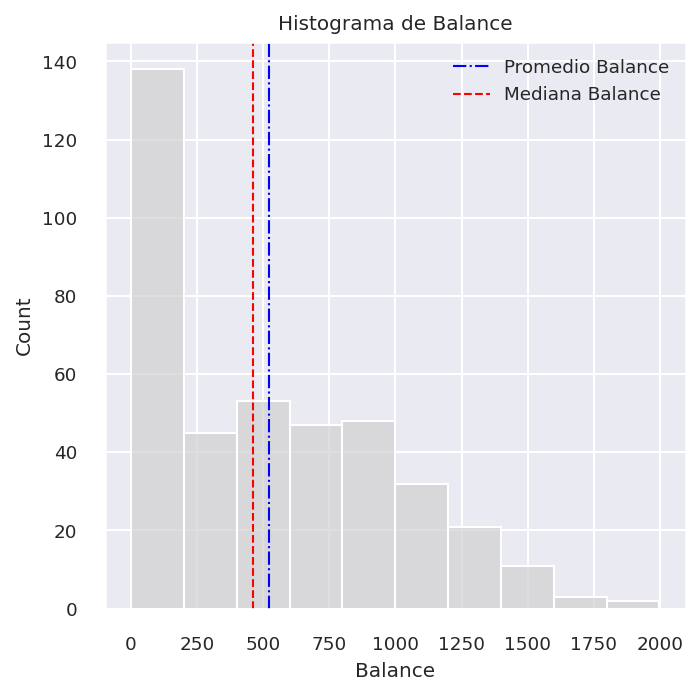

In [14]:
"""
----
Función plot_hist:
----
Argumentos:
1. dataframe: tabla de datos a incorporar. Objeto debe ser del tipo pd.Dataframe.
2: var: variable de dataframe que se desea graficar. Objeto debe ser del tipo integer o float.
----
La función realiza lo siguiente:
1. Validación: la variable dataframe debe ser del tipo pd.DataFrame, si no la función retornará un error.
2. Cambio de variable de dataframe
3. Ajustes de fuente del gráfico a realizar
4. Solicitar histograma con el método seaborn.histplot con la serie de la variable seleccionada, eliminando los registros nulos con el método .dropna(). Además, se configura colores del histograma.
5. Se crea variable mean_var para incorporar al gráfico una línea que represente el promedio de la serie de la variable seleccionada, eliminando los registros nulos. También se elige color (azul), ancho
de línea y tipo de línea.
6. Se crea variable median_var para incorporar al gráfico la mediana de la serie de la variable elegida, eliminando también los registros nulos. Se elige color (rojo), ancho de línea y su tipo.
7. Se crea leyenda con las variables de los puntos 4 y 5.
8. Se genera título de histograma.
----
"""

def plot_hist(dataframe, var):
  
  if isinstance(dataframe, pd.DataFrame) is True:

    tmp = dataframe
    sns.set(font_scale = 0.8)
    sns.histplot(tmp[var].dropna(), color = "lightgrey")
    mean_var = plt.axvline(np.mean(df[var].dropna()), color = "blue", lw = 1, linestyle = "-.")
    median_var = plt.axvline(np.median(df[var].dropna()), color = "red", lw = 1, linestyle = "--")
    plt.legend([mean_var, median_var], [f"Promedio {var}", f"Mediana {var}"])
    plt.title(f"Histograma de {var}")
 
  else:
    raise ValueError("Los datos no son del tipo pd.DataFrame, selecciona otros.")
 
plot_hist(df_bin, "Balance")

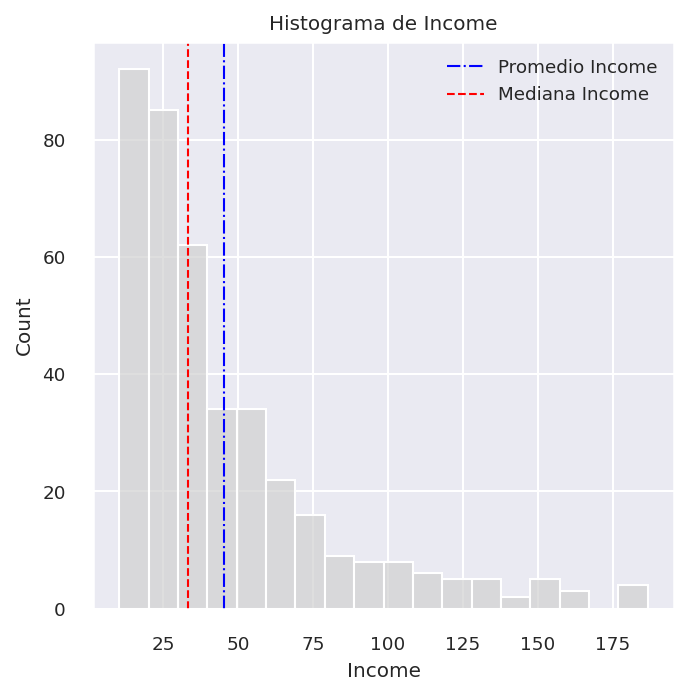

In [15]:
plot_hist(df_bin, "Income")

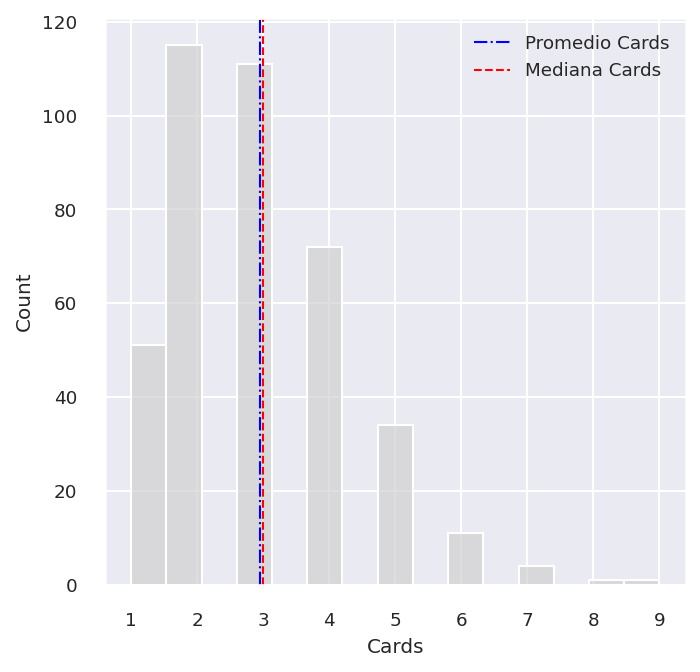

In [9]:
plot_hist(df_bin, "Cards")

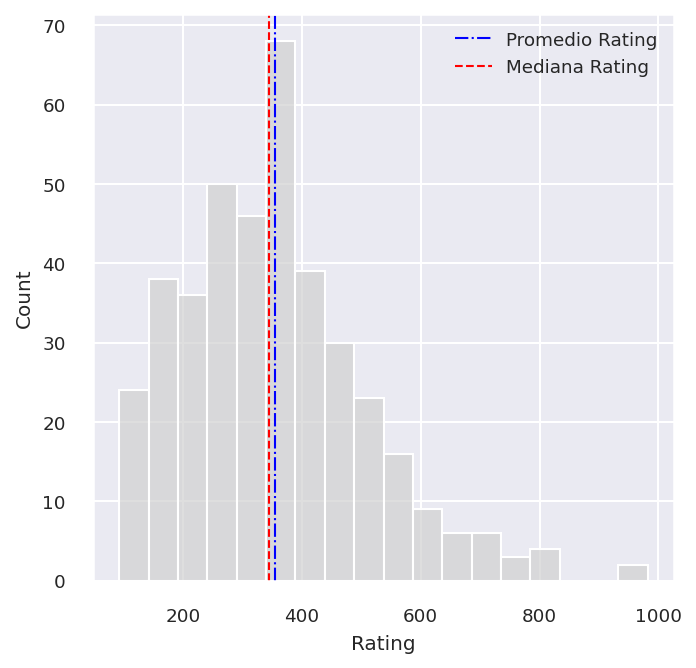

In [10]:
plot_hist(df_bin, "Rating")

1. Las variables se comportan de forma decreciente: Balance e Income decrecen desde su punto máximo al inicio del histograma. Lo anterior es consistente con la distribución de salarios que se observa comúnmente en otros casos: la mayor cantidad de personas presenta bajos sueldos, y la cantidad de personas con mayor remuneración disminuye. Balance es una variable que guarda una relación importante con Income dada la dependencia de los ingresos con la cantidad de dinero que tales personas manejan en su cuenta bancaria.
2. El caso de cards inicia con una cantidad menor al máximo, pero luego desde el segundo valor de la frecuencia también disminuye consistentemente a medida que la cantidad de tarjetas crece.
3. El caso de Rating es el que muestra una distribución más cercana a una curva normal completa, a diferencia de los casos anteriores que son más cercanos a la mitad de una.
4. En general, las medias y medianas son cercanas entre sí mostrando una distribución pareja de los resultados.

###**Desafío 3**

Se inicia creando el modelo con cada variable solicitada, y posteriormente reportando los resultados de cada caso.

In [10]:
model1 = smf.ols("Balance ~ Student_Yes", data = df_bin).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.49e-07
Time:                        22:13:01   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model2 = smf.ols("Balance ~ Income", data = df_bin).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.03e-22
Time:                        22:13:03   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model2 = smf.ols("Balance ~ Rating", data = df_bin).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1168.
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.90e-120
Time:                        22:13:05   Log-Likelihood:                -2745.4
No. Observations:                 400   AIC:                             5495.
Df Residuals:                     398   BIC:                             5503.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -390.8463     29.069    -13.446      0.000    -447.993    -333.699
Rating         2.5662      0.075     34.176      0.000       2.419       2.714
==============================================================================
Omnibus:                       23.223   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.802
Skew:                           0.390   Prob(JB):                     3.75e-09
Kurtosis:                       4.311   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

De lo anterior se concluye:

1. Rating está elaborado para calificar al cliente, ya que es una evaluación interna (en función de parte de las variables presentadas u otras desconocidas), y es la que presenta un índice R2 más alto, explicando un 74,6% de la variabilidad de Balance.
2. Respecto a las otras dos variables, Student explica un bajo porcentaje de la variabilidad de Balance, solo un 6,7%, Income tiene un mayor poder explicativo con un 21,5%.

Respecto a la prueba de hipótesis para la variable Student, calcular una regresión lineal sobre la variable binaria "Student_Yes" es equivalente. Si se revisa el modelo anterior, comparándolo con un test de hipótesis (con el método de scipy.stats):

In [13]:
#1
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     28.62
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           1.49e-07
Time:                        22:13:09   Log-Likelihood:                -3005.5
No. Observations:                 400   AIC:                             6015.
Df Residuals:                     398   BIC:                             6023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     480.3694     23.434     20.499      0.000     434.300     526.439
Student_Yes   396.4556     74.104      5.350      0.000     250.771     542.140
==============================================================================
Omnibus:                       20.866   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.920
Skew:                           0.544   Prob(JB):                     1.74e-05
Kurtosis:                       2.637   Cond. No.                         3.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#2.
stats.ttest_ind(df_bin.query("Student_Yes == 1")["Balance"], df_bin.query("Student_Yes == 0")["Balance"])

Ttest_indResult(statistic=5.349964123075003, pvalue=1.4877341077323024e-07)

Puede observarse que los valores coinciden:

1. Model1 F-statistic [1,49e-07] y Ttest pvalue[1] [1,4877e-07]
2. Model1 t[Student_Yes] [5,35] y Ttest statistic[0] [5,3499...]



###**Desafío 4**

Se inicia importando los módulos correspondientes:

In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Para generar el modelo que incluya todos los regresores, se volverá a trabajar con df_bin (dataframe ya creado que contiene las variables binarias):

In [19]:
y_vec = df_bin.loc[:, "Balance"]
X_mat = df_bin.drop(["Balance"], axis = 1)

X_train, X_test, y_train, y_test =  train_test_split(X_mat, y_vec, test_size = 0.3, random_state = 482)

model_allreg = linear_model.LinearRegression(fit_intercept = True, normalize = True).fit(X_train, y_train)
model_allreg_yhat = model_allreg.predict(X_test)

m1_mse = mean_squared_error(y_test, model_allreg_yhat).round(0)
m1_r2 = r2_score(y_test, model_allreg_yhat).round(2)

print("Modelo para predicción de variable Balance en dataframe df_bin con todas las variables como regresor:\nError Cuadrático es:", m1_mse, ", e indicador R2 es:", m1_r2)

Modelo para predicción de variable Balance en dataframe df_bin con todas las variables como regresor:
Error Cuadrático es: 9621.0 , e indicador R2 es: 0.96


###**Desafío 5**

Se revisa qué variables tienen el menor p-value:

In [17]:
cols = df_bin.columns
attr_name = []
pearson_r = []
abs_pearson_r = []

for col in cols:
  if col != "Balance":
    attr_name.append(col)
    pearson_r.append(df_bin[col].corr(df_bin["Balance"]))
    abs_pearson_r.append(abs(df_bin[col].corr(df_bin["Balance"])))

features = pd.DataFrame({
    "attribute": attr_name,
    "corr": pearson_r,
    "abs_corr": abs_pearson_r
})

features = features.set_index("attribute")
features.sort_values(by = ["abs_corr"], ascending = False)

,corr,abs_corr
attribute,,
Rating,0.863625,0.863625
Limit,0.861697,0.861697
Income,0.463656,0.463656
Student_No,-0.259018,0.259018
Student_Yes,0.259018,0.259018
Cards,0.086456,0.086456
Gender_Female,0.021474,0.021474
Gender_ Male,-0.021474,0.021474
Ethnicity_African American,0.013720,0.013720


Los atributos con correlación mayor son (respetando el orden):

1. Rating
2. Limit

Se ocuparán tales variables para un nuevo modelo y se compararán los indicadores de cada uno.

In [21]:
y_vec2 = df_bin.loc[:, "Balance"]
X_mat2 = df_bin.drop(["Income", "Cards", "Age", "Education", "Balance", "Gender_ Male", "Gender_Female", "Student_No", "Student_Yes", "Married_No", "Married_Yes", "Ethnicity_African American", "Ethnicity_Asian", "Ethnicity_Caucasian"], axis = 1)
X_train2, X_test2, y_train2, y_test2 =  train_test_split(X_mat2, y_vec2, test_size = 0.3, random_state = 482)
model_2reg = linear_model.LinearRegression(fit_intercept = True, normalize = True).fit(X_train2, y_train2)
model_2reg_yhat = model_2reg.predict(X_test2)

m2_mse = mean_squared_error(y_test2, model_2reg_yhat).round(0)
m2_r2 = r2_score(y_test2, model_2reg_yhat).round(2)

print("Modelo para predicción de variable Balance en dataframe df_bin con variables Rating y Limit como regresor:\nError Cuadrático es:", m2_mse, ", e indicador R2 es:", m2_r2)

Modelo para predicción de variable Balance en dataframe df_bin con variables Rating y Limit como regresor:
Error Cuadrático es: 52725.0 , e indicador R2 es: 0.77


Si se comparan los valores de model_allreg y model_2reg:

1. El error cuadrático aumenta de 9621 a 52725
2. El indicador R2 baja de 0.96 a 0.77

Por lo anterior, el nuevo modelo tiene una mejor capacidad predictiva respecto a la variable Balance. El error cuadrático aumentó por la diferencia de variables incorporadas entre los modelos. El modelo 1 es más preciso con la matriz de entrenamiento, pero posteriormente tiene menor capacidad predictiva.

###**Desafío 6**

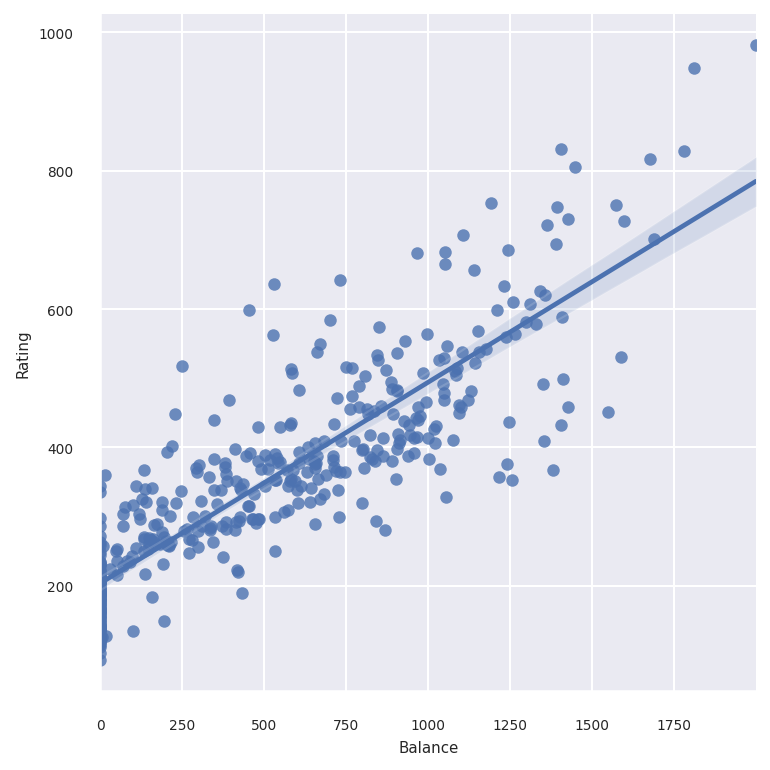

In [51]:
sns.lmplot(x = "Balance", y = "Rating", data = df_bin)

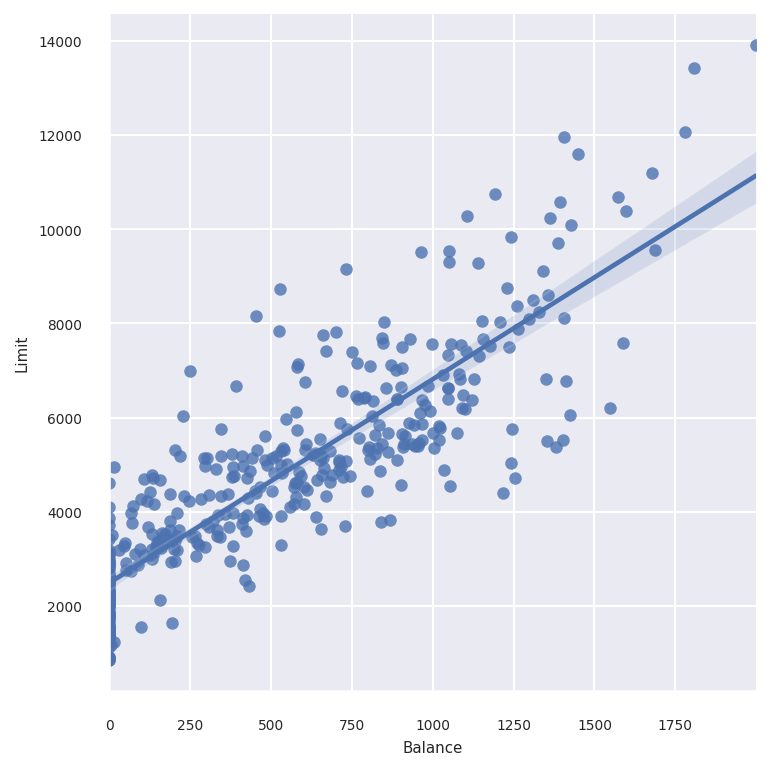

In [52]:
sns.lmplot(x = "Balance", y = "Limit", data = df_bin)

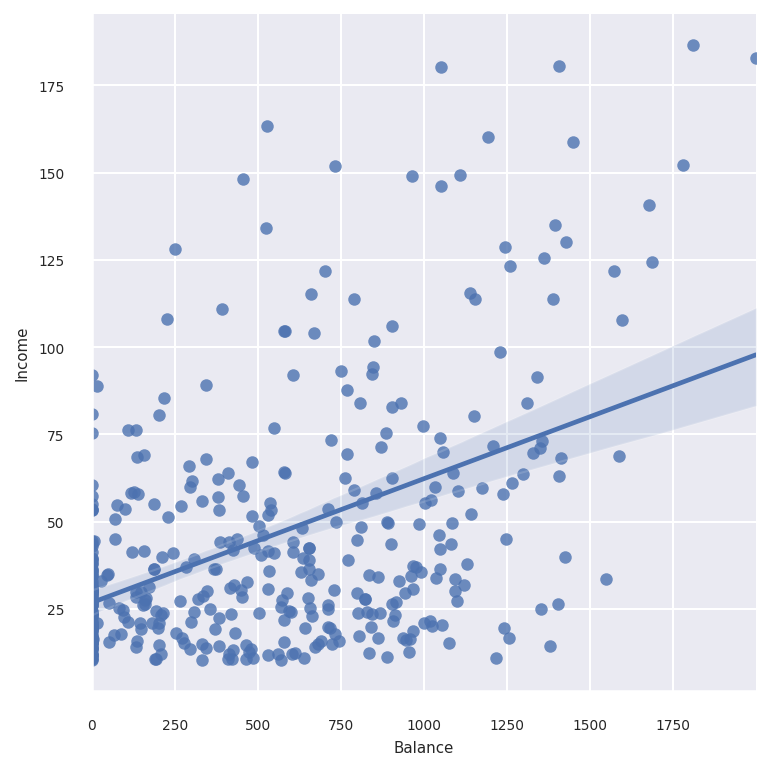

In [53]:
sns.lmplot(x = "Balance", y = "Income", data = df_bin)

1. Finalmente, se observa que Rating y Limit tienen gráficos similares, en ambos casos con un indicador absoluto PCC (Pearson Correlation Coefficient) cercano a 0.86, explicando una proporción importante de la variabilidad de Balance y mostrando una relación directa con ella.
2. Respecto a Income, el indicador absoluto PCC baja a 0.46, explicando una proporción menor de a variabilidad de Balance.